### Import Libraries

In [1]:
import cv2
from mtcnn import MTCNN
from keras_facenet import FaceNet
import matplotlib.pyplot as plt

### Face Embedding
MTCNN is used for face detection and FaceNet is used for face recognition.
The purpose is to capture facial features and save them as check-in passwords.

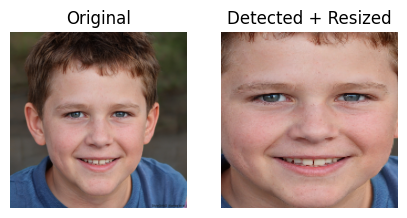

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step   
> dim of face emb: (512,)
> face emb (10,): [-0.00388953  0.05643379 -0.00278462  0.00421103  0.03593894 -0.04019986
 -0.04816633  0.01875233  0.06041828  0.0645652 ]


In [ ]:
# Define the models
detector = MTCNN()
embedder = FaceNet()

# Load the image
img_path = '../dataset/demo/face.jpg'
img = cv2.imread(img_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Face dectection
is_face = detector.detect_faces(img_rgb)

if not is_face:
    print('[Error] No face found, try another picture!')
else:
    # Take the face of first person
    x1, y1, width, height = is_face[0]['box']
    x1, y1 = abs(x1), abs(y1)
    x2, y2 = x1 + width, y1 + height
    
    face = img_rgb[y1:y2, x1:x2]
    face_resized = cv2.resize(face, (160, 160))

    # Show the face image
    plt.figure(figsize=(5, 10))
    plt.subplot(1, 2, 1)
    plt.imshow(img_rgb)
    plt.axis('off')
    plt.title('Original')

    plt.subplot(1, 2, 2)
    plt.imshow(face_resized)
    plt.axis('off')
    plt.title('Detected + Resized')
    plt.show()

    # Generate face embedding
    face_emb = embedder.embeddings([face_resized])[0]

    print(f'> dim of face emb: {face_emb.shape}')
    print(f'> face emb (10,): {face_emb[:10]}')